<h1 style = "color:Red">Acoustic Extinguisher Fire Dataset</h1>

<h2 style = "color : Green">Understand Business Problem</h2>

1. The dataset was obtained as a result of the extinguishing tests of **four different fuel flames**.<br></br>

2. While computer is used as **frequency** source.<br></br>

3. Anemometer was used to measure the **airflow** resulted from sound waves during the extinguishing phase of the flame.<br></br>

4. **Decibel** meter to measure the sound intensity. <br></br>

5. An infrared thermometer was used to measure the temperature of the flame.<br></br>

6. A total of 17,442 tests were conducted with this experimental setup.

# Import all Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_excel("Acoustic_Extinguisher_Fire_Dataset.xlsx")

In [3]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [4]:
df.shape

(17442, 7)

In [5]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


### My Observations:
1. Checked for data types.
2. Checked Null Values

In [7]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [8]:
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [9]:
df["SIZE"].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

<h3 style = "color:Green"> SIZE Recorded as 7cm =1, 12cm =2, 14cm =3, 16cm =4, 20cm =5<br></br>
5 different sizes of liquid fuel cans are used to achieve different size of flames.</h3>

In [10]:
df["FUEL"].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

<h3 style = "color:Green">Three different liquid fuels and LPG fuel were used to create the flame</h3>

In [11]:
df["DISTANCE"].unique()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190], dtype=int64)

<h3 style = "color:Green">While carrying out each experiment, the fuel container, at 10 cm distance, was moved forward up to 190 cm by increasing the distance by 10 cm each time.</h3>

In [12]:
df["DESIBEL"].unique()

array([ 96, 109, 103,  95, 102,  93, 110, 111, 105, 106, 108, 107,  90,
        92,  91,  88,  85,  83,  75, 104, 112, 113,  89, 100,  87,  80,
        78,  76, 101,  86,  97,  94,  84,  82,  98,  79,  74,  99,  72],
      dtype=int64)

<h3 style = "color:Green">Along with the fuel container, anemometer and decibel meter were moved forward in the same dimensions.</h3>

In [13]:
df["AIRFLOW"].unique()

array([ 0. ,  2.6,  3.2,  4.5,  7.8,  9.7, 12. , 13.3, 15.4, 15.1, 15.2,
       16. , 15.7, 15.5, 14.9, 17. , 16.6, 14.5, 13.8, 14.4, 12.3, 11.9,
       12.5, 12.9, 11.8, 11. ,  8.8,  6. ,  3.1,  0.8,  1. ,  1.1,  4. ,
        6.5,  7.5,  9. , 15. , 14.6, 16.3, 14.8, 14.1, 13.5, 12.8, 13.6,
       13.2, 11.5, 11.2, 12.2,  9.6,  5. ,  3.7,  0.4,  2.2,  7. , 16.1,
       14.2, 11.6, 10.9, 10.3, 10.7, 10. , 11.3, 10.2,  9.2,  7.4,  1.3,
       13.9, 13.1, 10.4,  2.8,  6.4, 13.4, 14.3, 10.6,  9.9, 10.5,  9.3,
        8.3,  5.8,  4.4,  9.5, 12.6, 14. ,  8.6,  3.4,  1.9,  7.2, 13. ,
        8.1,  3.8,  2. ,  8.2,  7.7,  7.9,  8.5,  2.1,  2.5,  6.1,  8.9,
        1.5,  5.4,  4.9,  5.7,  7.1,  9.1,  5.6,  4.6,  5.2,  3. ,  2.7,
        4.2,  4.8,  6.8,  6.7,  8.7,  7.3,  3.3,  3.6,  5.3,  6.3,  3.9,
        1.4,  1.6,  2.3,  1.7,  4.3,  2.9])

In [44]:
print(df["FREQUENCY"].unique())
print(70*'*')
print(df["FREQUENCY"].nunique())

[75 72 70 68 67 66 65 60 55 52 51 50 48 47 46 45 44 42 40 38 36 35 34 33
 32 30 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7
  6  5  4  3  2  1]
**********************************************************************
54


<h3 style = "color:Green">Fire extinguishing experiments was conducted with 54 different frequency sound waves at each distance and flame size.</h3>

---

---

---

---

<h1 style = "color:red"> Overall Observations</h1>

**SIZE** 7, 12, 14, 16, 20 cm Recorded as 1,2,3,4,5 <br></br>
**FUEL** Gasoline, Kerosene, Thinner Fuel type <br></br>
**DISTANCE** 10 - 190 cm <br></br>
**DESIBEL** 72 - 113 dB <br></br>
**AIRFLOW** 0 - 17 m/s <br></br>
**FREQUENCY** 1-75 Hz <br></br>
**STATUS** 0, 1 <br></br>
**0** indicates the **non-extinction state**, 
**1** indicates the **extinction state**

<h1 style = 'color:Green'>EDA & Visualization</h1>

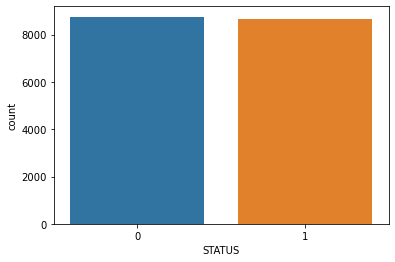

0    8759
1    8683
Name: STATUS, dtype: int64

In [15]:
sns.countplot(x='STATUS', data=df);
plt.show()
df.STATUS.value_counts()

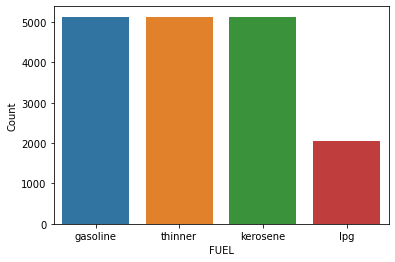

In [16]:
counts = df.FUEL.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('FUEL')
plt.ylabel('Count')
plt.show()

<h2 style = "color : Green"> Balanced Dataset</h2>

<h2 style = "color : Blue"> Converting Categorical data to Numerical data</h2>

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df['FUEL'] = le.fit_transform(df['FUEL'])

In [19]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1


In [20]:
df["FUEL"].unique()

array([0, 3, 1, 2])

<h3 style = "color:Green"> 0 = gasoline, 1 = kerosene, 3 = thinner, 4 = lpg</h3>

# X & y

In [21]:
X = df.drop(columns = ['STATUS'], axis=1)
y = df.STATUS

In [22]:
X

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0,10,96,0.0,75
1,1,0,10,96,0.0,72
2,1,0,10,96,2.6,70
3,1,0,10,96,3.2,68
4,1,0,10,109,4.5,67
...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5
17438,7,2,190,84,2.0,4
17439,7,2,190,80,1.5,3
17440,7,2,190,76,0.4,2


In [23]:
y

0        0
1        1
2        1
3        1
4        1
        ..
17437    0
17438    0
17439    0
17440    0
17441    0
Name: STATUS, Length: 17442, dtype: int64

# Train & Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 32)

# Applying ML Algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier()

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
model.score(X_train,y_train)

1.0

In [30]:
model.score(X_test,y_test)

0.9623542900821709

In [31]:
pre = model.predict(X_test)

In [32]:
pre

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2678
           1       0.96      0.96      0.96      2555

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RF = RandomForestClassifier()

In [36]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
RF.score(X_train,y_train)

1.0

In [38]:
RF.score(X_test,y_test)

0.9600611503917447

In [39]:
from sklearn.svm import SVC

In [40]:
SVC = SVC()

In [41]:
SVC.fit(X_train,y_train)

SVC()

In [42]:
SVC.score(X_train,y_train)

0.8904906216725367

In [43]:
SVC.score(X_test,y_test)

0.8882094400917255